<a href="https://colab.research.google.com/github/AzisilhamK463/PCVK_2023/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRAKTIKUM 3**

NAMA: AZIS ILHAM KURNIAWAN

NIM: 2141720145

# LANGKAH PRAKTIKUM

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [9]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


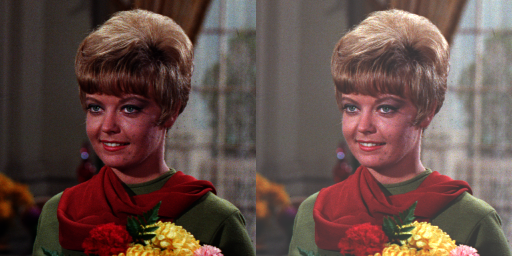

In [4]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness=int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original= cv.imread('/content/drive/MyDrive/female.tiff')
brightness_image=np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c]=np.clip(original[y,x,c]+brightness,0,255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame=cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# TUGAS PRAKTIKUM

**1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori**

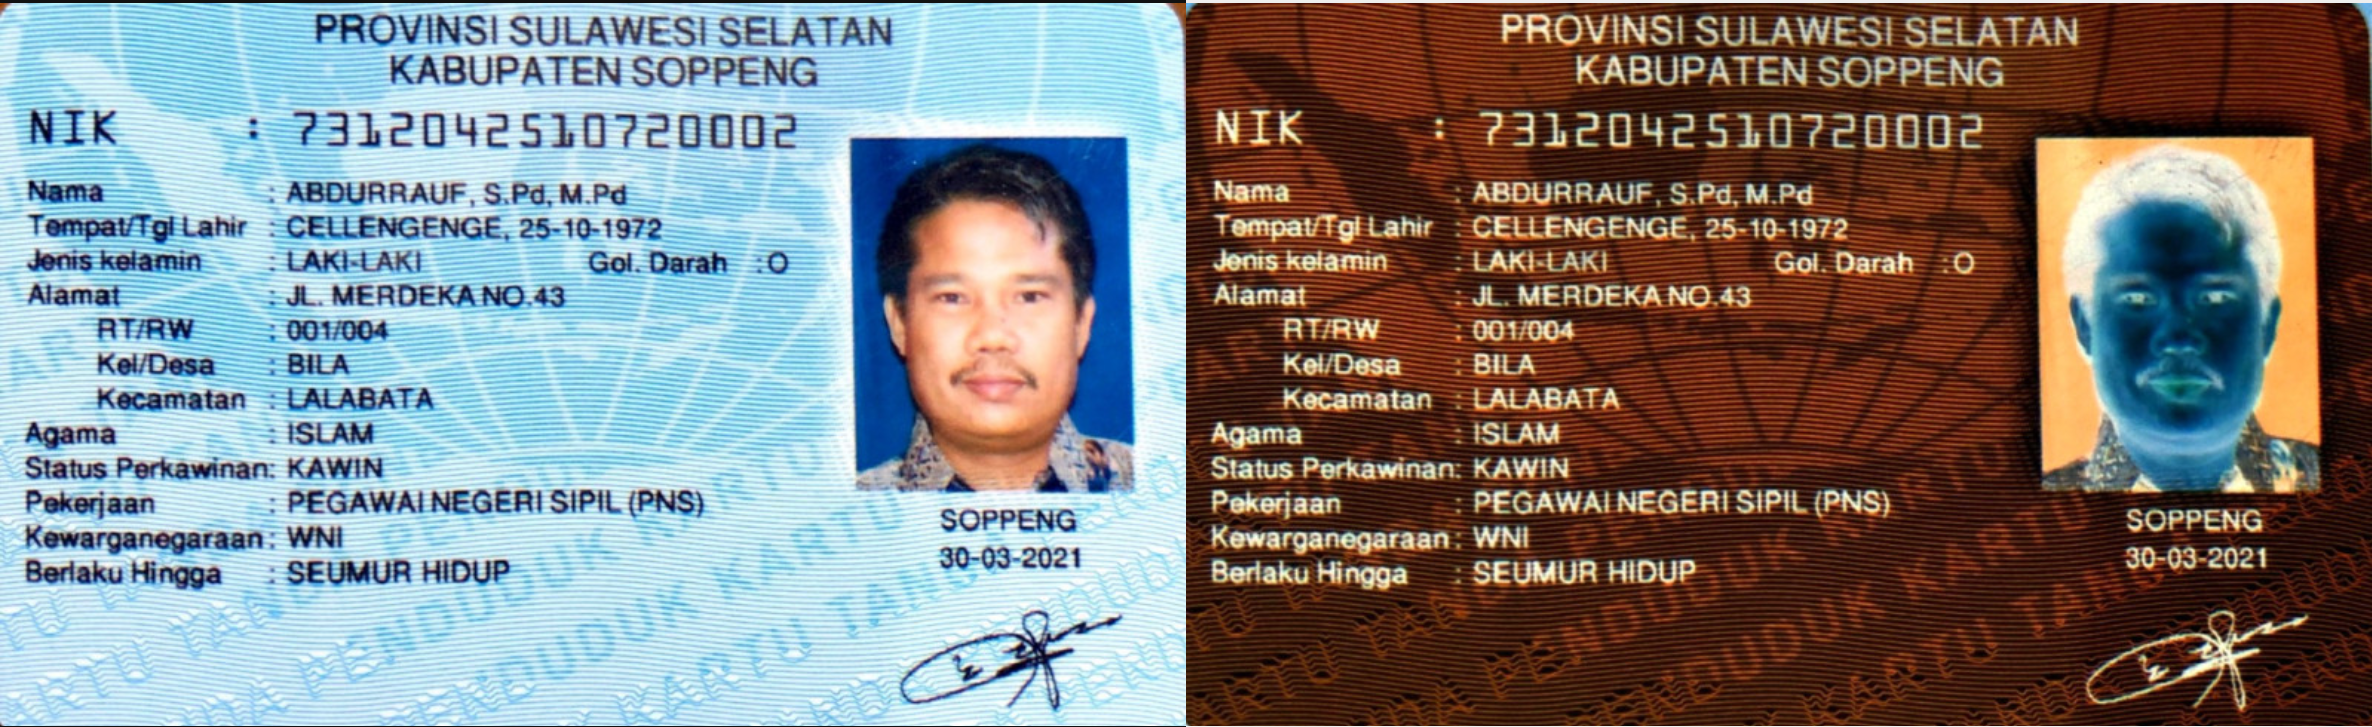

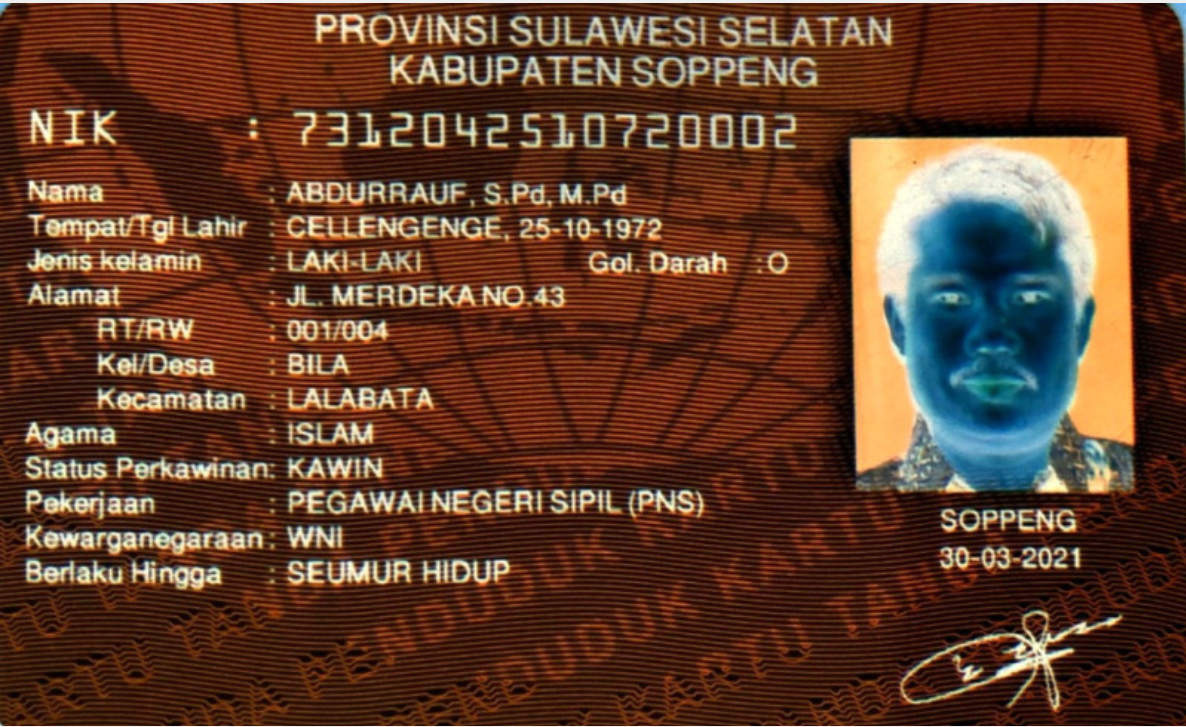

In [6]:
path='/content/drive/MyDrive/KTP.png'
image=cv.imread(path)
inverted_image = cv.bitwise_not(image)

invertedFrame=cv.hconcat((image,inverted_image))
cv2_imshow(invertedFrame)

path='/content/drive/MyDrive/KTP.png'
image = cv.imread(path)
invert = np.zeros(image.shape,image.dtype)
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            invert[y,x,c]=np.clip(255 - image[y,x,c] ,0,255)

cv2_imshow(invert)

**2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras**

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukan tingkat kecerahan [-255 - 255]:100
Masukkan kontras [1.0 - 3.0]:2.5


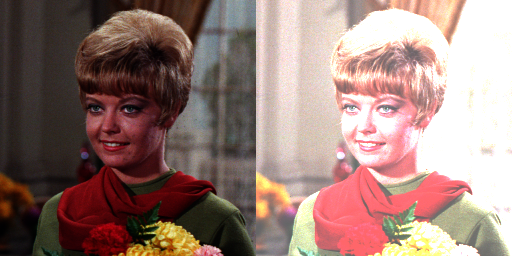

In [7]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')

try:
  brightness = int(input('Masukan tingkat kecerahan [-255 - 255]:'))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

**3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log**

 Mengubah tingkat kecerahan citra dengan Transformasi Log
----------------------------------------------
Masukkan nilai kecerahan:50


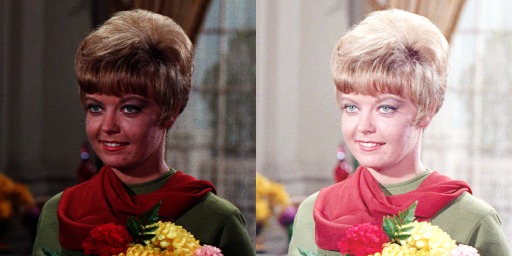

In [8]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('----------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*  (np.log(1 + original[y,x,c])), 0 , 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori**

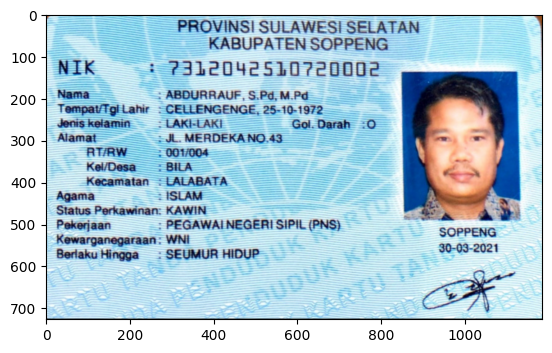

In [11]:
img = cv.imread('/content/drive/MyDrive/KTP.png')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

**a. Averaging**

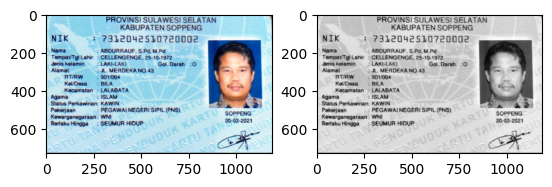

In [12]:
# Averaging

img_avg = cv.imread('/content/drive/MyDrive/KTP.png')
img_avg[:] = img_avg.mean(axis=2, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

**b. Lightness**

In [25]:
# Lightness

# Fungsi grayscale lightness

def grayscaleLightness(image):
    grayscale_image = image.copy()

    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            # Ambil nilai saluran warna (R, G, B) pada setiap piksel
            red = int(image[y, x, 2])
            green = int(image[y, x, 1])
            blue = int(image[y, x, 0])

            # Hitung nilai lightness
            lightness = (max(red, green, blue) + min(red, green, blue)) // 2

            # Atur nilai lightness pada setiap saluran warna (R, G, B)
            grayscale_image[y, x, 0] = lightness
            grayscale_image[y, x, 1] = lightness
            grayscale_image[y, x, 2] = lightness

    return grayscale_image

# Baca citra
path ='/content/drive/MyDrive/KTP.png'
image = cv.imread(path)

grayscale_lightness_image = grayscaleLightness(image)

# Menampilkan citra
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('citra asli')
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(grayscale_lightness_image, cv.COLOR_BGR2RGB))
ax[1].set_title('grayscale lightness')
ax[1].axis('off')
plt.show()


**c. Luminance**

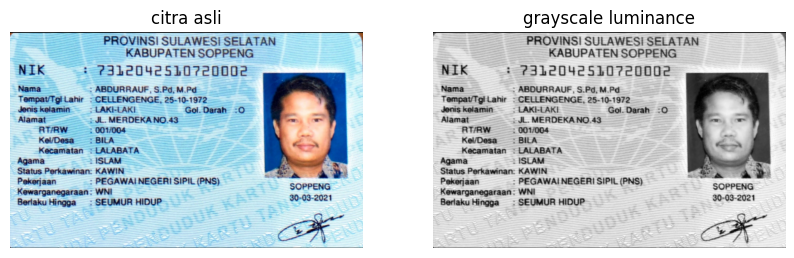

In [15]:
# Luminance

# Fungsi grayscale luminance
def grayscaleLuminance(image):
    grayscale_image = image.copy()

    # perhitungan nilai luminance pada setiao piksel
    luminance = 0.21 * image[:, :, 2] + 0.72 * image[:, :, 1] + 0.07 * image[:, :, 0]

    # mengatur nilai luminance pada setiap saluran warna (R,G,B)
    grayscale_image[:, :, 0] = luminance
    grayscale_image[:, :, 1] = luminance
    grayscale_image[:, :, 2] = luminance

    return grayscale_image

# membaca citra
path = '/content/drive/MyDrive/KTP.png'
image = cv.imread(path)

# Konversi citra
grayscale_luminance_image = grayscaleLuminance(image)

# Menampilkan citra
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('citra asli')
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(grayscale_luminance_image, cv.COLOR_BGR2RGB))
ax[1].set_title('grayscale luminance')
ax[1].axis('off')
plt.show()

**5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale**

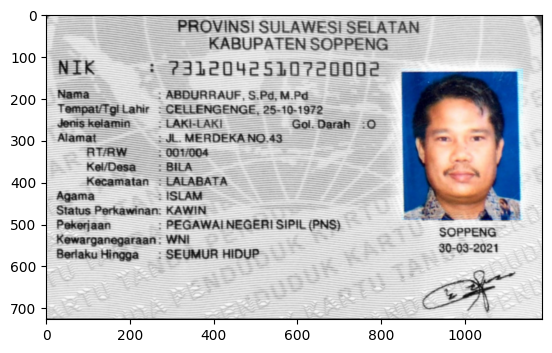

In [26]:
path = '/content/drive/MyDrive/KTP.png'
image = cv.imread(path)

# Menentukan titik koordinat yang tidak akan di greyscale
x1, y1 = 850,130  # Koordinat sudut kiri atas
x2, y2 = 1140,490  # Koordinat sudut kanan bawah

result_image = image.copy()

# Loop melalui setiap piksel dalam citra
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        if x1 <= x <= x2 and y1 <= y <= y2:
            result_image[y, x] = image[y, x]
        else:
            gray_value = np.mean(image[y, x])
            result_image[y, x] = gray_value

# Menampilkan citra hasil grayscale
plt.imshow(cv.cvtColor(result_image, cv.COLOR_BGR2RGB))
plt.show()


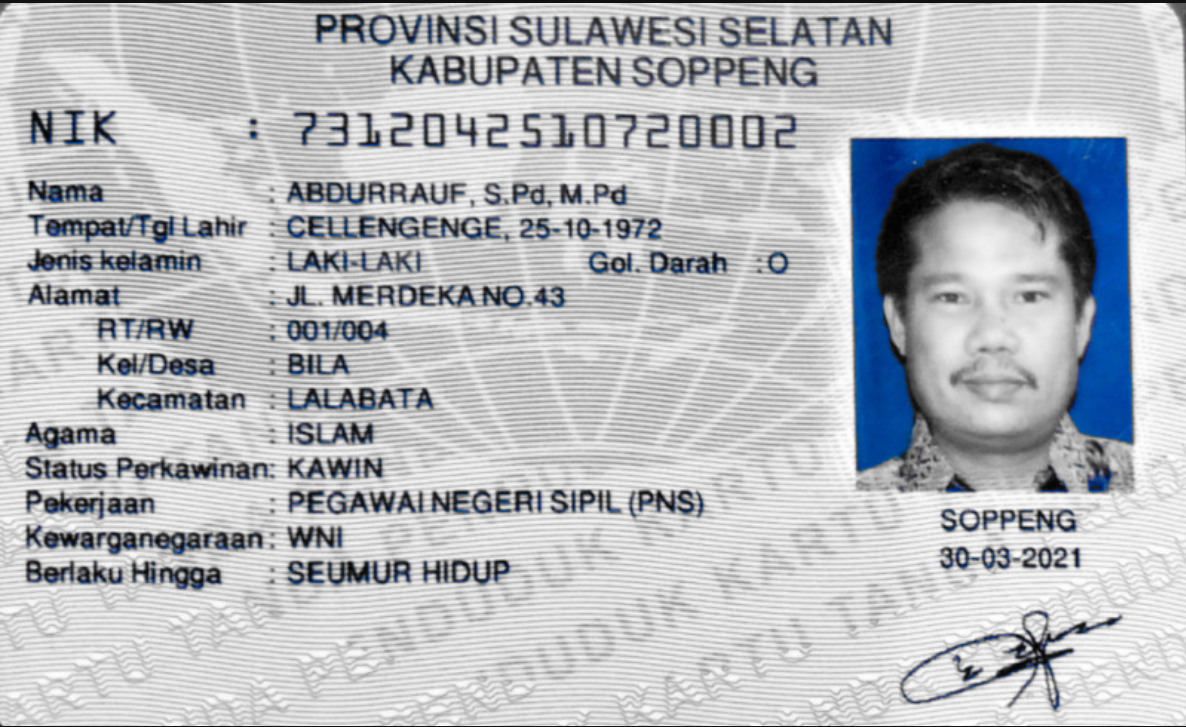

In [24]:
image = cv.imread('/content/drive/MyDrive/KTP.png')

# Menentukan batas warna dalam bentuk BGR
lower_blue = np.array([100, 0, 0])
upper_blue = np.array([255, 100, 100])

# Mendapatkan dimensi citra
height, width, channels = image.shape

# Membuat citra grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

final_result = np.zeros_like(image)

# for loop untuk setiap piksel
for y in range(height):
    for x in range(width):
        pixel = image[y, x]

        # Memeriksa piksel saat ini berada dalam warna biru
        if (pixel >= lower_blue).all() and (pixel <= upper_blue).all():
            final_result[y, x] = image[y, x]  # membiarkan warna itu seperti aslinya
        else:
            final_result[y, x] = [gray[y, x], gray[y, x], gray[y, x]]  # mengubah warna yang bukan biru menjadi greyscale

# Menampilkan citra hasil
cv2_imshow(final_result)
cv.waitKey(0)
cv.destroyAllWindows()